## <span style='background :yellow' > Here we will be analyzing the sales records of company </span>

In [387]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import altair as alt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsRegressor
from warnings import filterwarnings
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')
filterwarnings('ignore')

## Introducing the data set and understanding variables

In [49]:
df = pd.read_excel("../Siparis-Tablosu.xlsx", sheet_name="Sipariş Detayı")

In [50]:
df.head()

,Order ID,ProductName,DiscountRate,Sales$,Profit,Amount,Category,SubCategory
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,17,-1,2,Office Supplies,Storage


In [48]:
print({"data_types": df.dtypes,
        "         "
      "data_Shape:":df.shape})

{'data_types': Order ID         object
ProductName      object
DiscountRate    float64
Sales             int64
Profit            int64
Amount            int64
Category         object
SubCategory      object
dtype: object, '         data_Shape:': (8047, 8)}


## <span style='background :yellow' > Here we can have an initial idea about the distribution of variables </span>

In [51]:
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
DiscountRate,8047.0,0.110047,0.181773,0.0,0.0,0.0,0.1,0.85
Sales$,8047.0,291.845657,485.212156,3.0,48.0,117.0,313.0,6517.00
Profit,8047.0,35.198211,178.125844,-3060.0,1.0,14.0,47.0,2476.00
Amount,8047.0,3.772089,2.203369,1.0,2.0,3.0,5.0,14.00


In [56]:
df.describe(include="all").T  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order ID,8047,4117,AZ-2014-7040665,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductName,8047,1810,"Eldon File Cart, Single Width",26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DiscountRate,8047,NaN,NaN,NaN,0.110047,0.181773,0,0,0,0.1,0.85
Sales$,8047,NaN,NaN,NaN,291.846,485.212,3,48,117,313,6517
Profit,8047,NaN,NaN,NaN,35.1982,178.126,-3060,1,14,47,2476
Amount,8047,NaN,NaN,NaN,3.77209,2.20337,1,2,3,5,14
Category,8047,3,Office Supplies,5286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubCategory,8047,17,Art,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df.corr()

,DiscountRate,Sales$,Profit,Amount
DiscountRate,1.000000,-0.026350,-0.351328,0.003686
Sales$,-0.026350,1.000000,0.441217,0.353441
Profit,-0.351328,0.441217,1.000000,0.098670
Amount,0.003686,0.353441,0.098670,1.000000


In [55]:
df.isnull().mean() # checking null value

Order ID        0.0
ProductName     0.0
DiscountRate    0.0
Sales$          0.0
Profit          0.0
Amount          0.0
Category        0.0
SubCategory     0.0
dtype: float64

In [68]:
df.groupby(["DiscountRate","Category","SubCategory"]).agg({"Profit":"mean"}) ## This way of table shows the profitability

Profit
DiscountRate Category        SubCategory             
0.00         Furniture       Bookcases     213.420118
                             Chairs        139.785714
                             Furnishings    51.289963
                             Tables        385.800000
             Office Supplies Appliances    312.900990
...                                               ...
0.65         Technology      Machines     -153.500000
                             Phones       -548.200000
0.70         Furniture       Tables       -916.166667
0.80         Furniture       Furnishings  -142.000000
0.85         Furniture       Tables      -1925.000000

[78 rows x 1 columns]

  ## <span style='background :green' > Visualization </span>

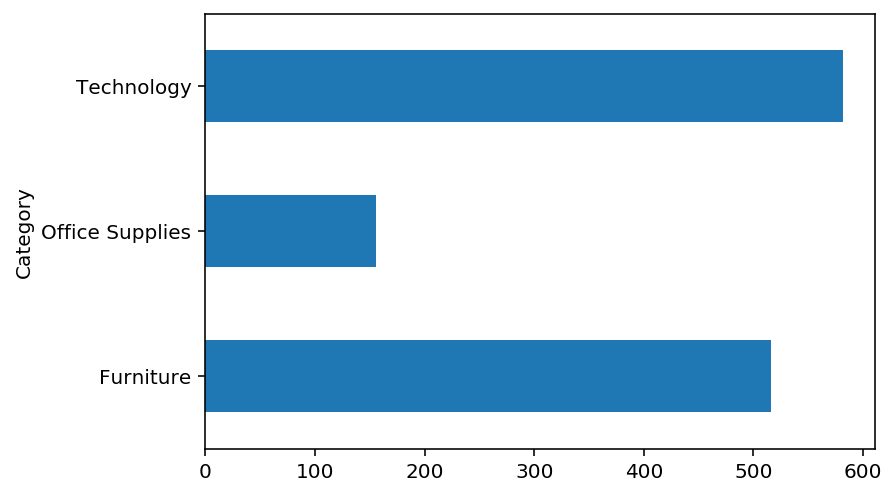

In [79]:
%config InlineBackend.figure_format = 'retina'
df.groupby("Category").mean()["Sales$"].plot.barh();    # Which Category brings more income

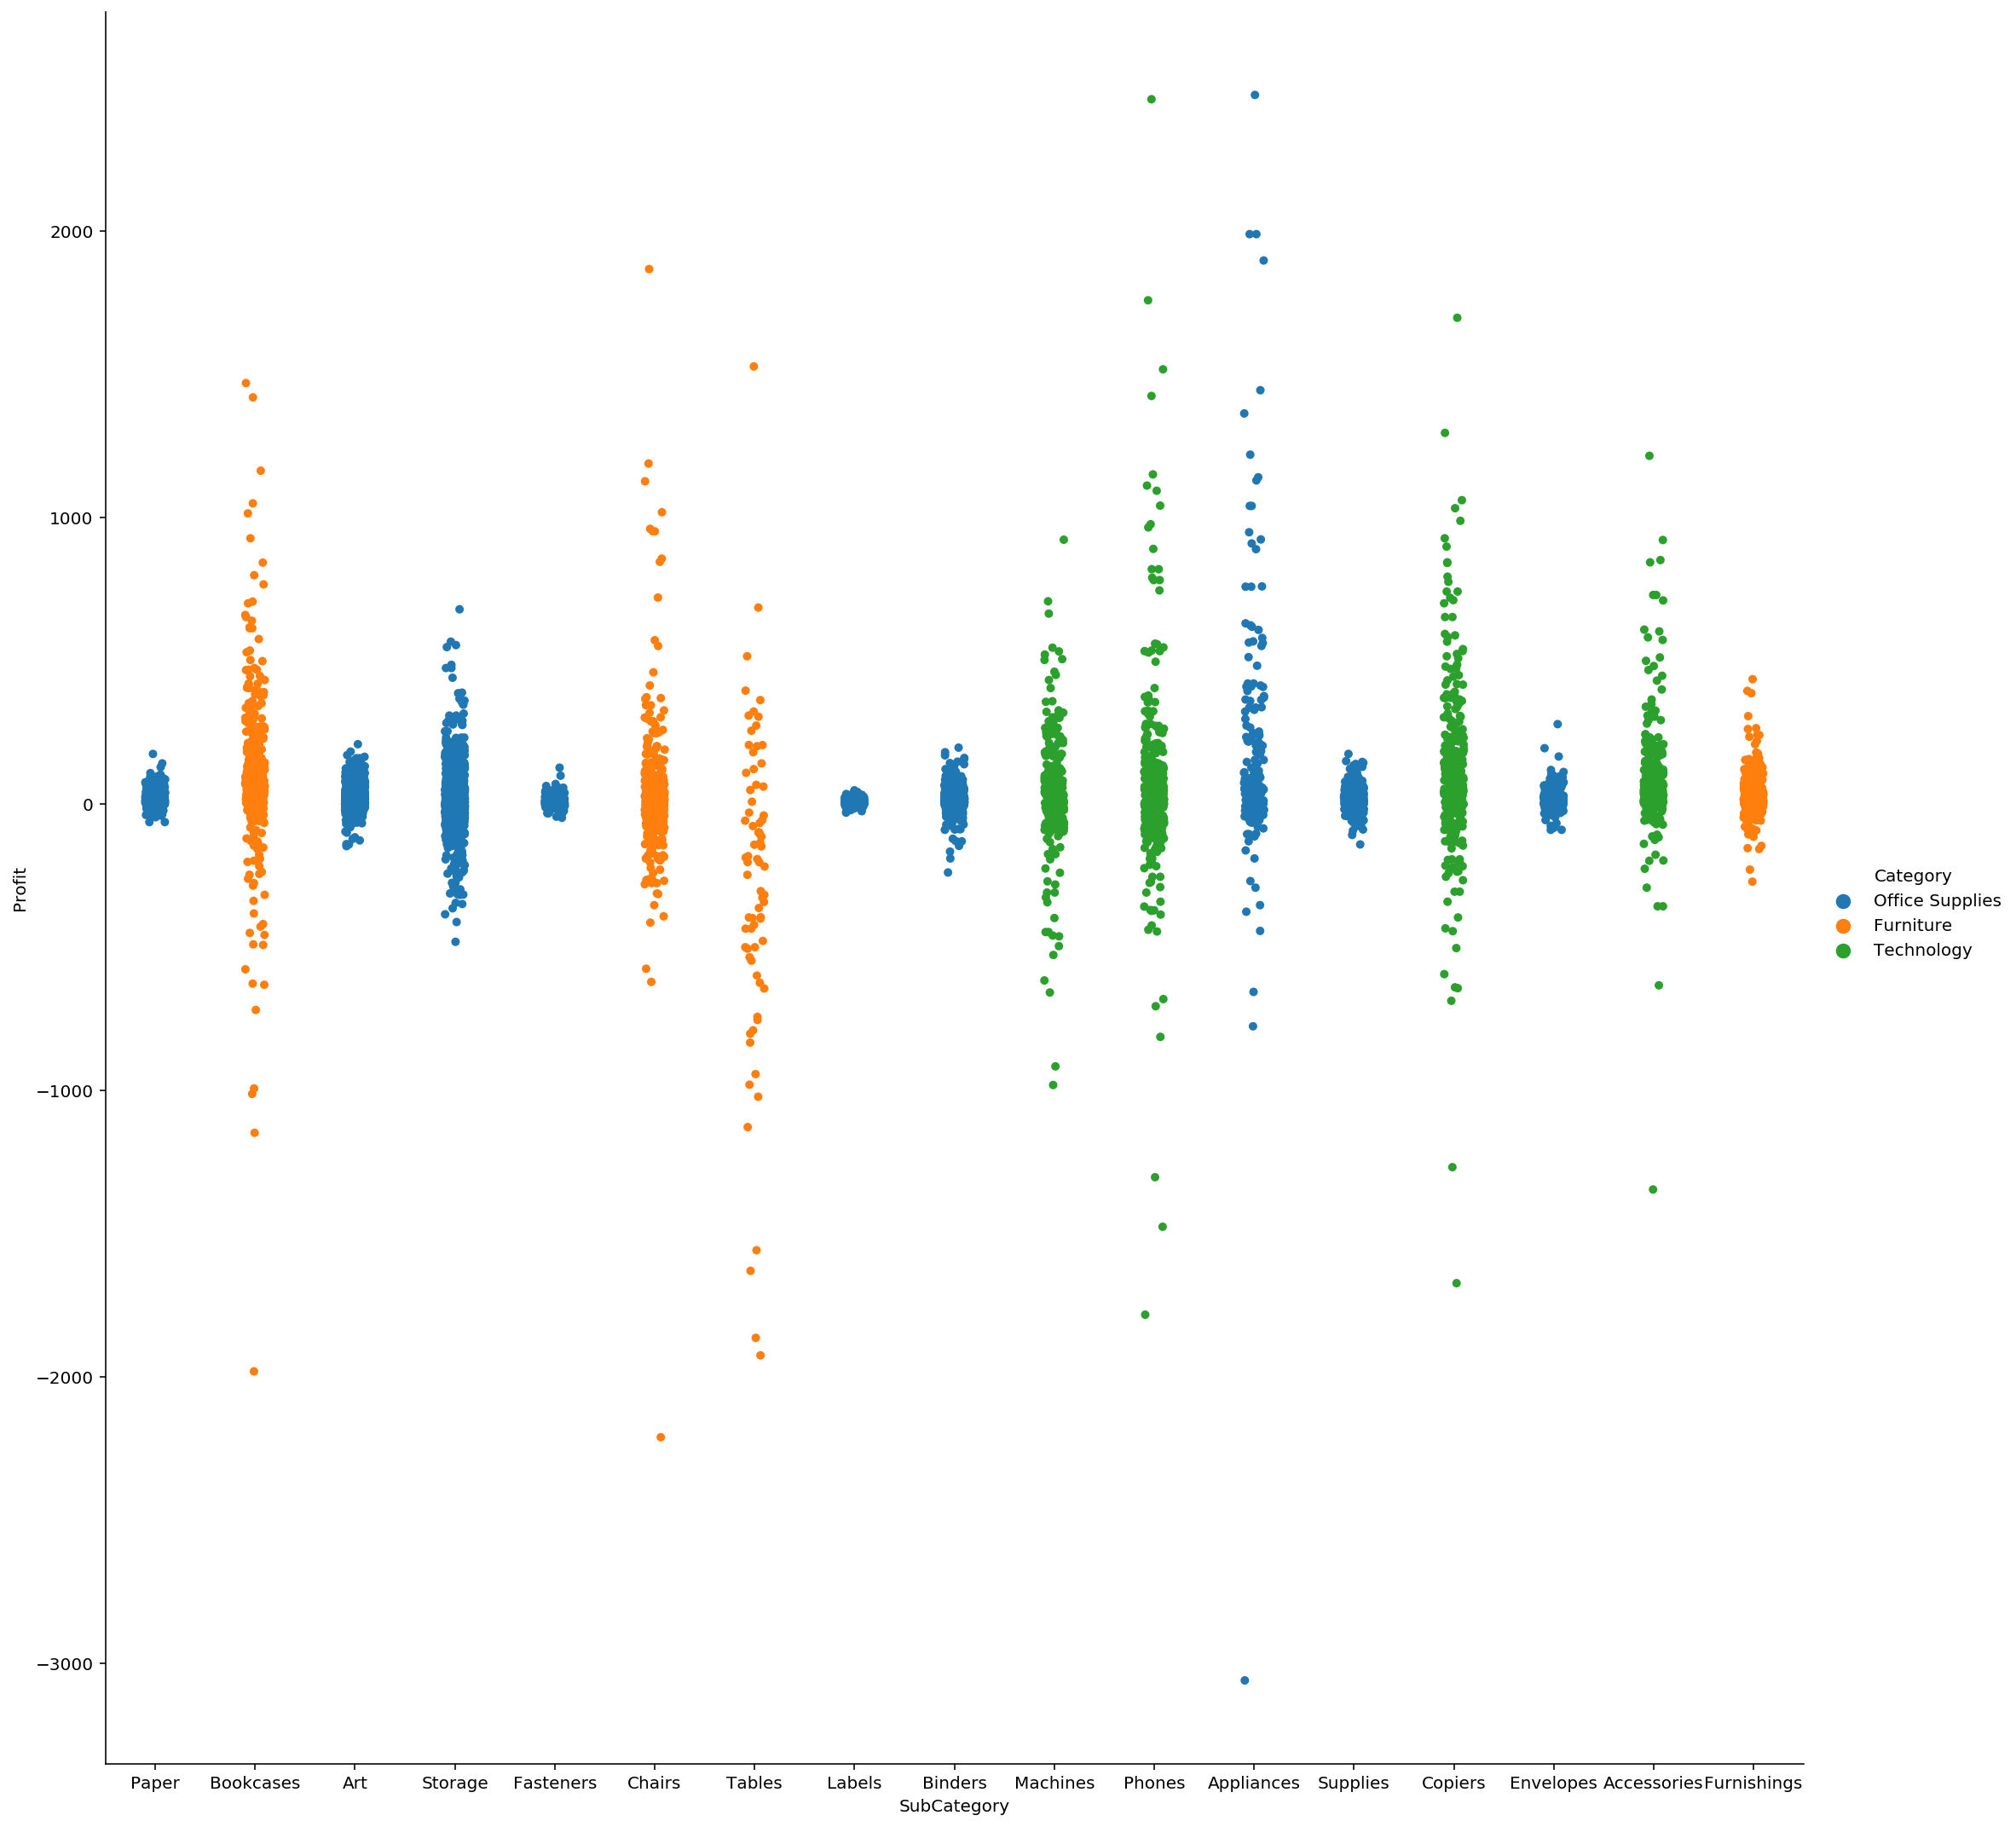

In [107]:
sns.catplot(x = 'SubCategory' , y = "Profit", data = df,height=15,hue="Category"); # Distribution of profit margin among SubCategories

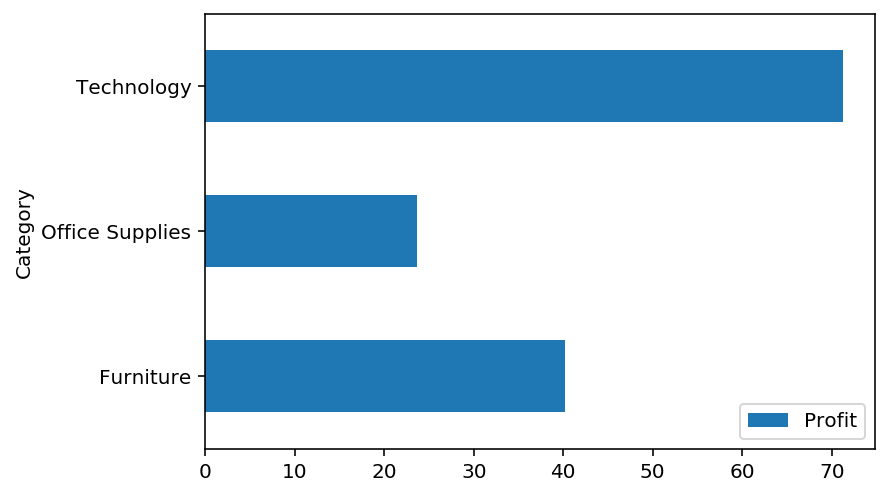

In [80]:
df.groupby("Category").agg({"Profit":"mean"}).plot.barh(); # Which category brings more profit

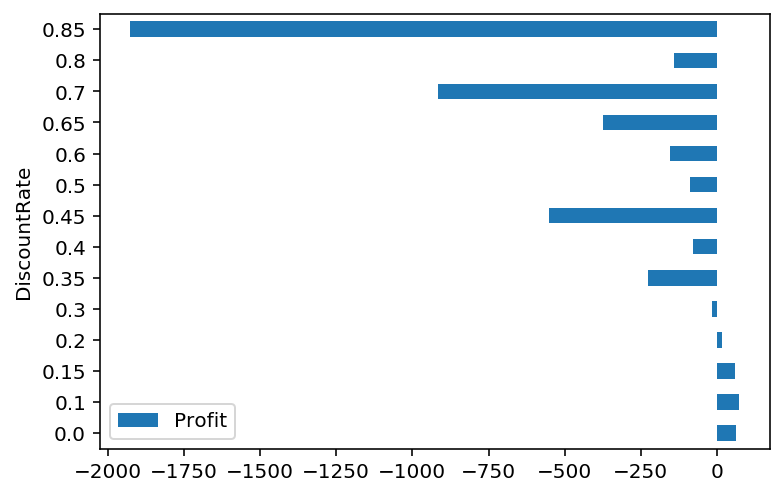

In [381]:
%config InlineBackend.figure_format = 'retina'

df.groupby("DiscountRate").agg({"Profit":"mean"}).plot.barh(); ## Here we are able to understand the profitability is increasing around 0,0--0,15 discount rate.

In [84]:
def situation(profit):
    if profit >= 0:
        return "Profit"
    else:
        return "Loss"

In [85]:
df["Situation"] = df["Profit"].apply(situation)

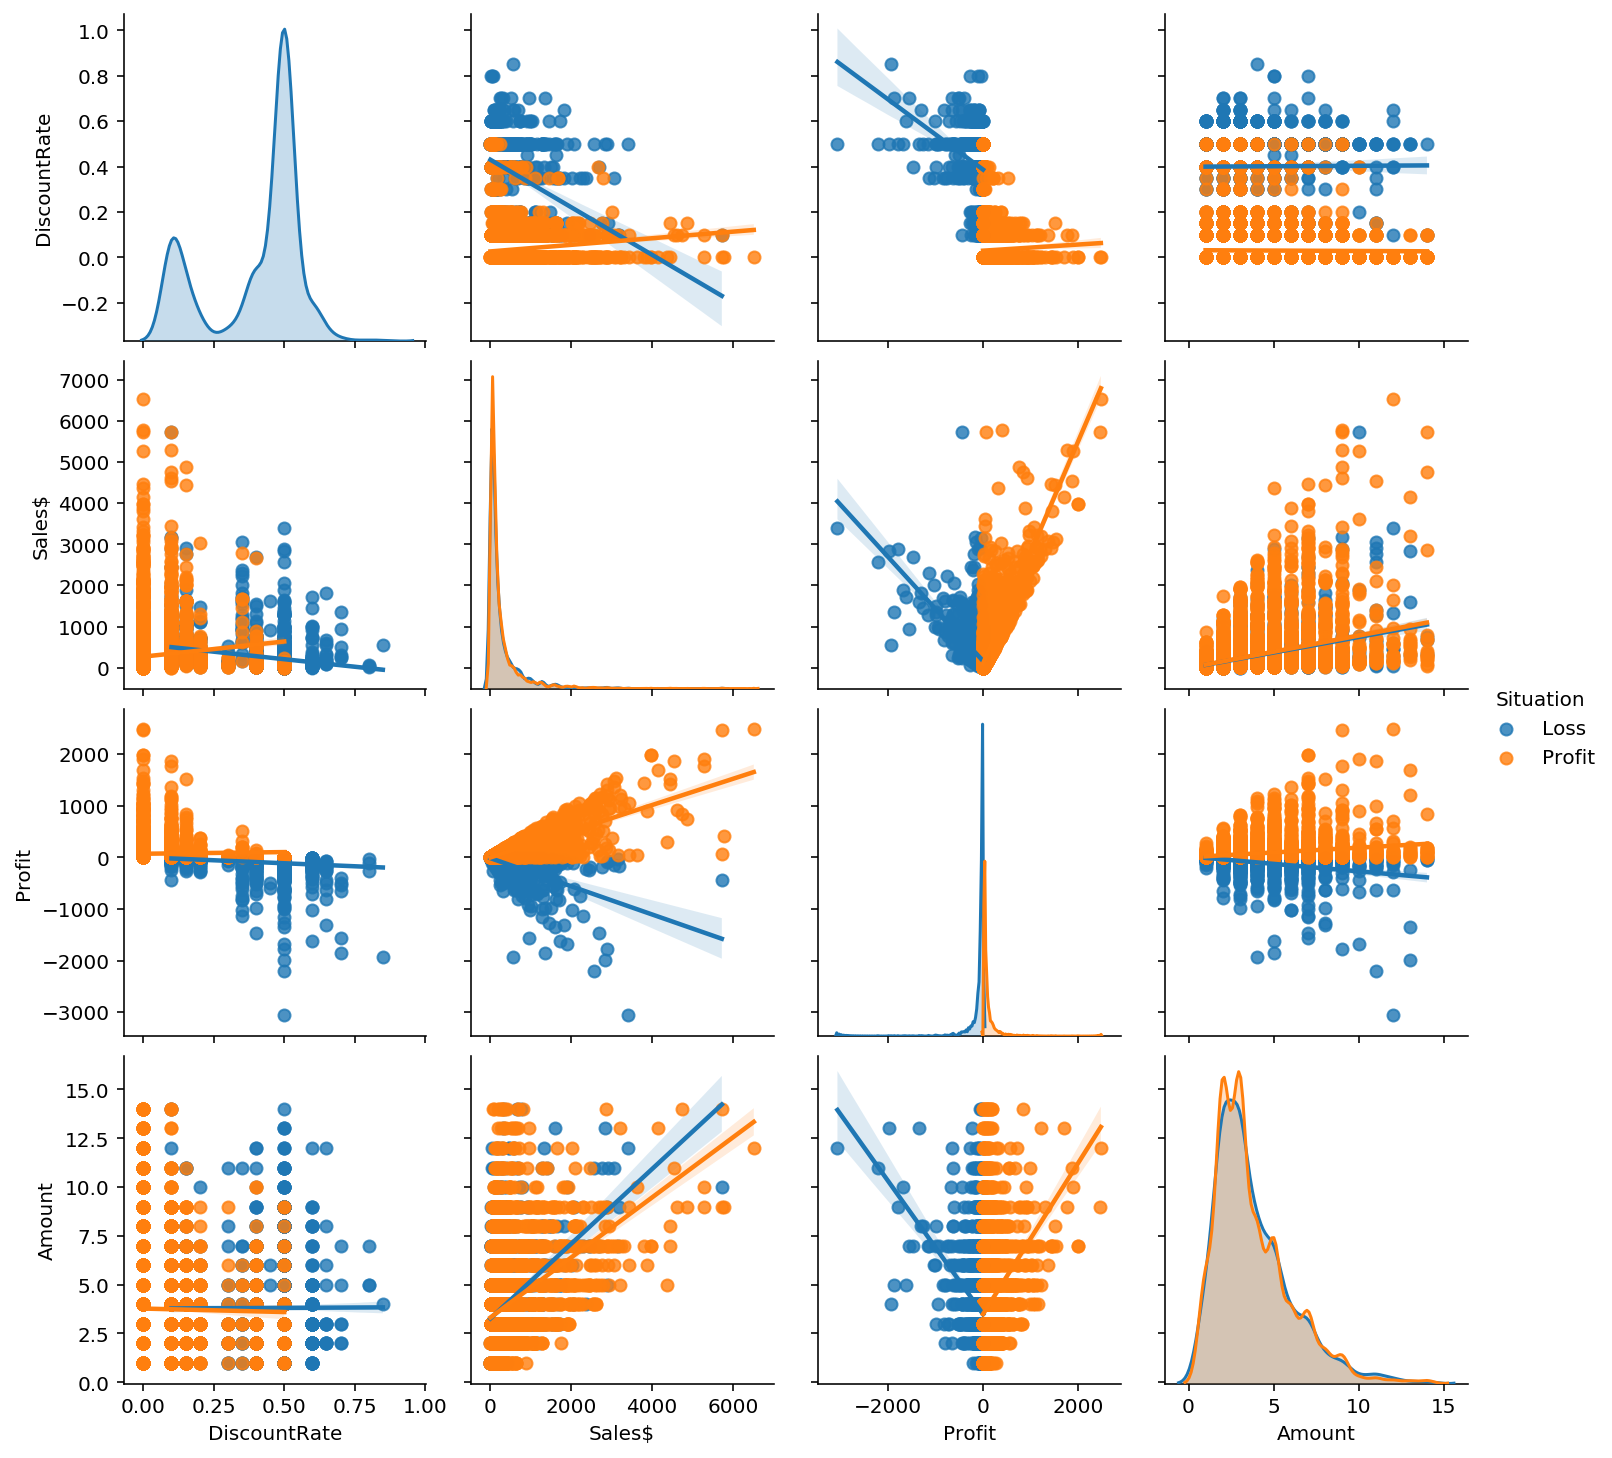

In [86]:
sns.pairplot(df, vars= ["DiscountRate","Sales$","Profit","Amount"],hue="Situation", kind="reg") # Here we seperated the graphs according to situation

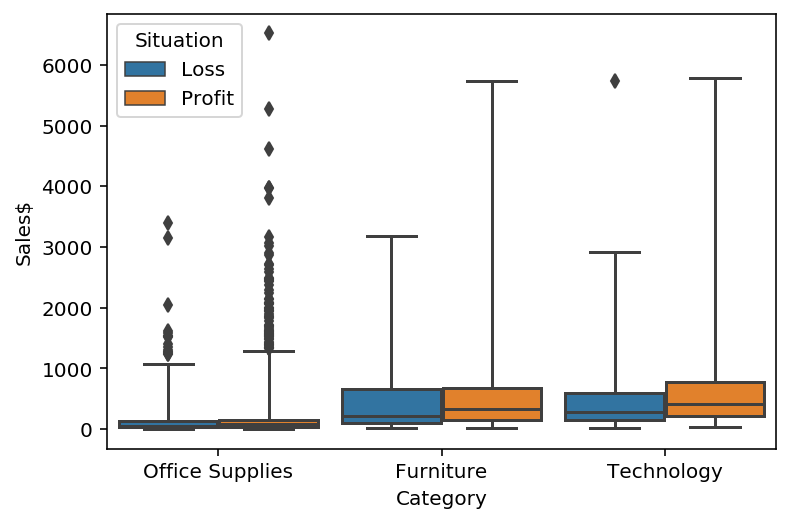

In [379]:
sns.boxplot(x='Category',y='Sales$',hue = 'Situation', data = df,whis=10,width=.9) # The graph shows the relationship of Profit and Loss between Categories

## Creating Machine Learning Model with KNN&RF&LogisticsRegression

In [117]:
def map_category(category):
    if category == 'Office Supplies':
        return 1
    elif category == 'Furniture':
        return 2
    elif category == 'Technology':
        return 3

In [119]:
df1 = df.copy()
df1["Category"] = df1["Category"].apply(map_category)

In [125]:
X = df1.drop(["Order ID","ProductName","SubCategory","Situation","Profit"], axis = 1)
y = df1.Profit

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30,
                                                          train_size = 0.70, random_state =0)

In [129]:
knn_model = KNeighborsRegressor().fit(X_train, y_train) # Building Model

In [130]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [131]:
y_pred = knn_model.predict(X_test)

In [134]:
np.sqrt(mean_squared_error(y_test,y_pred)) # Calculation the Error.

167.31945028317594

In [139]:
new_data = [[0.5],[27],[2],[1]]
new_data = pd.DataFrame(new_data).T

knn_model.predict(new_data)   ##Looks like model is predicting well, however I will try to optimize the model by finding best hyperparameters.

array([-18.8])

In [285]:
df.head(10)

,Order ID,ProductName,DiscountRate,Sales$,Profit,Amount,Category,SubCategory,Situation
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper,Loss
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases,Profit
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art,Profit
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,27,-22,2,Office Supplies,Art,Loss
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,17,-1,2,Office Supplies,Storage,Loss
5,AZ-2011-617423,"Binney & Smith Pencil Sharpener, Water Color",0.0,90,21,3,Office Supplies,Art,Profit
6,AZ-2011-617423,"Sanford Canvas, Fluorescent",0.0,207,77,4,Office Supplies,Art,Profit
7,AZ-2011-2918397,"Bush Floating Shelf Set, Pine",0.1,155,36,1,Furniture,Bookcases,Profit
8,AZ-2011-2918397,"Accos Thumb Tacks, Assorted Sizes",0.0,33,2,3,Office Supplies,Fasteners,Profit
9,AZ-2011-2918397,"Smead Lockers, Industrial",0.1,716,143,4,Office Supplies,Storage,Profit


In [140]:
RMSE = []

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train,y_pred))
    RMSE.append(rmse)
    print("k=",k, "için RMSE value", rmse)

k= 1 için RMSE value 16.75974423995296
k= 2 için RMSE value 105.8054451062587
k= 3 için RMSE value 128.88901334867512
k= 4 için RMSE value 136.43468708221639
k= 5 için RMSE value 142.48292720692731
k= 6 için RMSE value 146.39835367344085
k= 7 için RMSE value 147.38190903606295
k= 8 için RMSE value 149.31249818838532
k= 9 için RMSE value 150.77108879815836
k= 10 için RMSE value 152.88629418251864


In [141]:
from sklearn.model_selection import GridSearchCV

In [157]:
knn_params = {"n_neighbors": np.arange(1,30,1)}
knn =KNeighborsRegressor()

In [158]:
knn_cv_model = GridSearchCV(knn,knn_params, cv =10)

In [159]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [160]:
knn_cv_model.best_params_["n_neighbors"] 

23

In [152]:
RMSE = []
RMSE_CV =[]

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train,y_pred))
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model,X_train,y_train,cv=10,
                                        scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse)
    RMSE_CV.append(rmse_cv)
    print("k=",k, " RMSE value", rmse, "RMSE_CV value:", rmse_cv)

k= 1  RMSE value 16.75974423995296 RMSE_CV value: 222.1203644391432
k= 2  RMSE value 105.8054451062587 RMSE_CV value: 193.19605311150775
k= 3  RMSE value 128.88901334867512 RMSE_CV value: 184.9912315989125
k= 4  RMSE value 136.43468708221639 RMSE_CV value: 179.14293553569996
k= 5  RMSE value 142.48292720692731 RMSE_CV value: 176.14514879564152
k= 6  RMSE value 146.39835367344085 RMSE_CV value: 174.57388836995958
k= 7  RMSE value 147.38190903606295 RMSE_CV value: 171.90409750355903
k= 8  RMSE value 149.31249818838532 RMSE_CV value: 171.61344542445832
k= 9  RMSE value 150.77108879815836 RMSE_CV value: 171.99767331289104
k= 10  RMSE value 152.88629418251864 RMSE_CV value: 170.08631728475808


In [162]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                    weights='uniform')

In [163]:
np.sqrt(mean_squared_error(y_test,knn_tuned.predict(X_test))) # Our mean squared error has decreased from 167 to 151

151.28093134200765

In [174]:
new_data = [[0.5],[116],[5],[1]]
new_data = pd.DataFrame(new_data).T
y_pred1=knn_tuned.predict(X)

In [177]:
k_t = pd.DataFrame({"Prediction": y_pred1[0:10],
                    "Real_vallue": y[0:10]})
k_t                    

,Prediction,Real_vallue
0,-4.173913,-26
1,107.695652,290
2,21.347826,21
3,-2.739130,-22
4,-2.869565,-1
5,20.652174,21
6,-20.086957,77
7,28.521739,36
8,7.739130,2
9,81.130435,143


## LogisticRegression

In [216]:
def situation_num(profit):
    if profit >= 0:
        return 1
    else:
        return 0

In [221]:
df2 = df1.copy()


In [222]:
df2["Profit"] = df2["Profit"].apply(situation_num)

In [233]:
X1 = df2.drop(["Order ID","ProductName","SubCategory","Situation","Profit"], axis = 1)
y1 = df2.Profit

In [240]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.30,
                                                          train_size = 0.70, random_state =0)

In [248]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X1_train,y1_train)
#loj_model.coef_

In [249]:
y_pred = loj_model.predict(X1)

In [391]:
accuracy_score(y1,y_pred)

0.9343854852740152

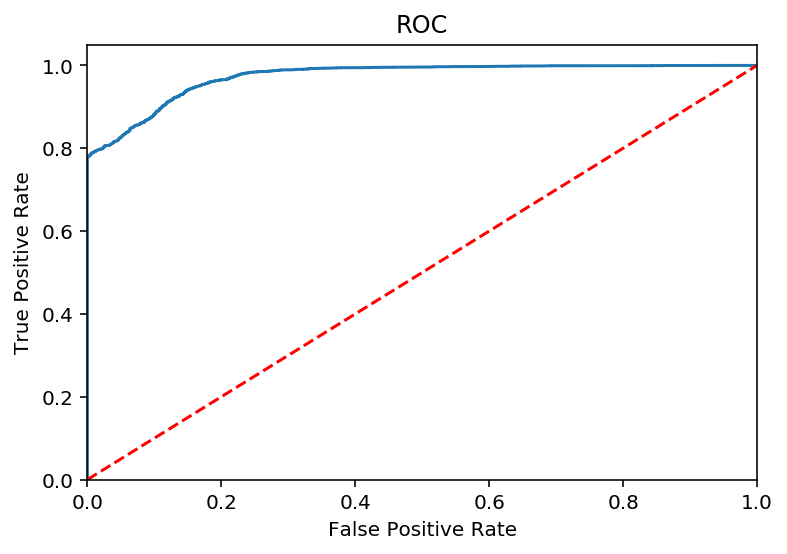

In [257]:
logit_roc_auc = roc_auc_score(y1, loj_model.predict(X1))

fpr, tpr, thresholds = roc_curve(y1, loj_model.predict_proba(X1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0, 1.0])
plt.ylim([-0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [258]:
cross_val_score(loj_model,X1_test,y1_test,cv=10).mean()

0.9399660505469635

## Random Forest

In [353]:
df3 = df1.copy()


In [ ]:
x = df3.drop(["Order ID","ProductName","SubCategory","Situation","Profit"], axis = 1)
y = df3.Profit

In [354]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30,
                                                          train_size = 0.70, random_state =0)

In [355]:
forest = RandomForestRegressor(n_estimators= 100,
                            criterion= "mse",
                            random_state= 1,
                            n_jobs= -1)

forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 2218.922, MSE test data: 11646.519
R2 train data: 0.934, R2 test data: 0.565


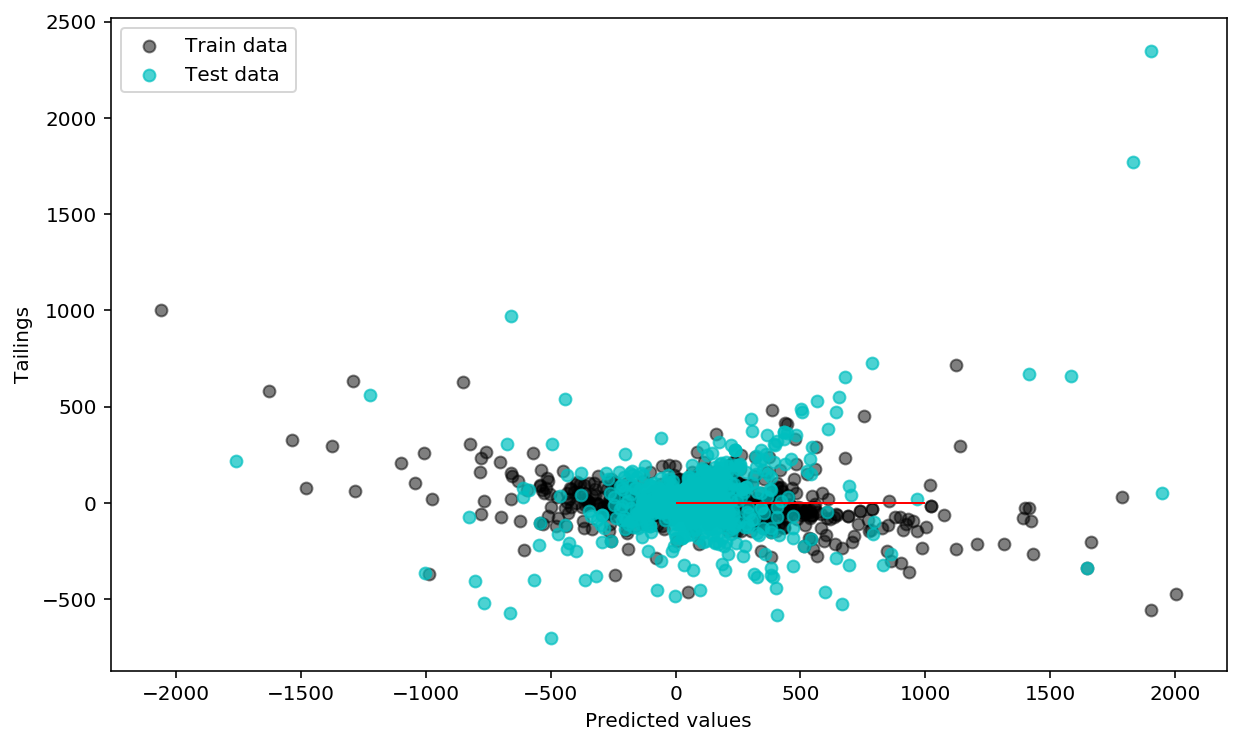

In [356]:
import matplotlib.pyplot as pl

pl.figure(figsize=(10,6))

pl.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 1000, lw = 1, color = 'red')
pl.show()

In [357]:
new_data = [[0.0],[854],[7],[2]]
new_data = pd.DataFrame(new_data).T
y_pred2 = forest.predict(x)

In [358]:
pd.DataFrame({"Prediction": y_pred2[0:10],
              "Real_value": y[0:10]})

,Prediction,Real_value
0,-19.991333,-26
1,233.349476,290
2,30.047036,21
3,-18.110399,-22
4,-5.982603,-1
5,23.482197,21
6,55.557492,77
7,29.007286,36
8,9.125724,2
9,217.410214,143


## OPTIMIZING THE RF MODEL

In [296]:
from skompiler import skompile
print(skompile(loj_model.predict).to("python/code"))

__step__(np.array([-12.663198247298308, -0.00019396995738446554, 
    0.004325903389729509, -0.20139586398564668]) @ x + 3.6658920479721964)



In [418]:
forest.score(x_train,y_train)

0.9305436937889272

In [419]:
rf_params = {"n_estimators": np.arange(1,30,1)}
rf =RandomForestRegressor()

In [420]:
rf_cv_model = GridSearchCV(forest,rf_params, cv =10)

In [421]:
rf_cv_model.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=N

In [422]:
rf_cv_model.best_params_

{'n_estimators': 27}

In [423]:
rf_tuned = RandomForestRegressor(n_estimators= 27)


In [424]:
rf_tuned.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=27, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [425]:
rf_tuned.score(x_train,y_train)

0.9250144228365744

In [414]:
np.sqrt(mean_squared_error(y_test,forest.predict(x_test)))

89.06740122166933

In [426]:
np.sqrt(mean_squared_error(y_test,rf_tuned.predict(x_test))) # Comparin the MSE, we have little better result with optimized parameters.

90.39906926232794

In [370]:
rf_tuned = RandomForestRegressor(n_estimators= 27)
                                

rf_tuned.fit(x_train, y_train)
forest_train_pred = rf_tuned.predict(x_train)
forest_test_pred = rf_tuned.predict(x_test)
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 2127.071, MSE test data: 11207.170
R2 train data: 0.937, R2 test data: 0.581


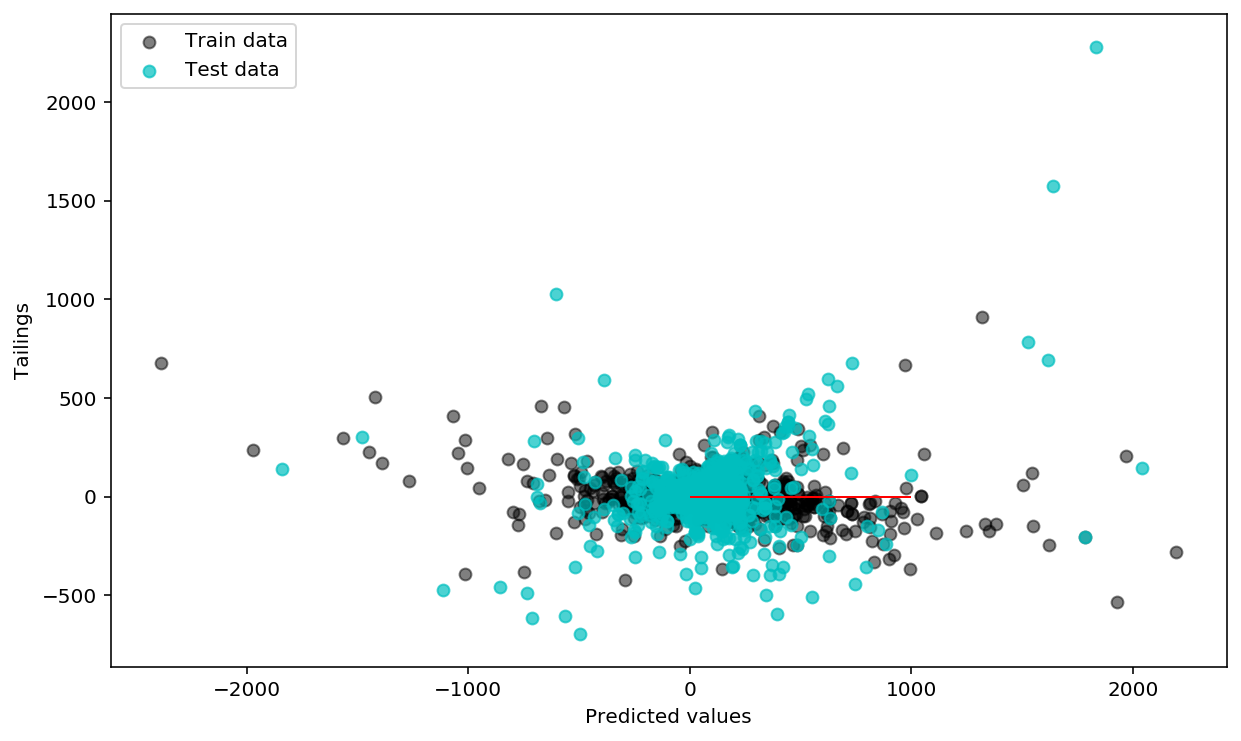

In [371]:
pl.figure(figsize=(10,6))

pl.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 1000, lw = 1, color = 'red')
pl.show()

[My Linkedin link ] (https://www.linkedin.com/in/volkan-eymir-akçora/)

In [392]:
df4 = df3.copy()

In [395]:
df4["SubCategory"] = df4["SubCategory"].apply(map_category)

In [406]:
df4.head()

,Order ID,ProductName,DiscountRate,Sales$,Profit,Amount,Category,SubCategory,Situation
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,45,-26,3,1,9.0,Loss
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,854,290,7,2,6.0,Profit
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,1,2.0,Profit
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,27,-22,2,1,2.0,Loss
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,17,-1,2,1,4.0,Loss


In [407]:
x = df4.drop(["Order ID","ProductName","Situation","Profit"], axis = 1)
y = df4.Profit

In [394]:
def map_category(Kategori):
    if Kategori =='Tables':
        return 1
    elif Kategori == 'Art':
        return 2
    elif Kategori == 'Binders':
        return 3
    elif Kategori == 'Storage':
        return 4
    elif Kategori == 'Phones':
        return 5
    elif Kategori == 'Bookcases':
        return 6
    elif Kategori == 'Furnishings':
        return 7
    elif Kategori == 'Chairs':
        return 8
    elif Kategori == 'Paper':
        return 9
    elif Kategori == 'Labels':
        return 10
    elif Kategori == 'Accessories':
        return 11
    elif Kategori == 'Copiers':
        return 12
    elif Kategori == 'Fasteners':
        return 13
    elif Kategori == 'Supplies':
        return 14
    elif Kategori == 'Envelopes':
        return 15
    elif Kategori == 'Machines':
        return 16
    

In [405]:
df4.replace([np.inf, -np.inf], np.nan)

df4.dropna(inplace=True)

In [408]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30,
                                                          train_size = 0.70, random_state =0)

In [417]:
forest = RandomForestRegressor(n_estimators= 100,
                            criterion= "mse",
                            random_state= 1,
                            n_jobs= -1)

forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 1910.366, MSE test data: 7933.002
R2 train data: 0.931, R2 test data: 0.663


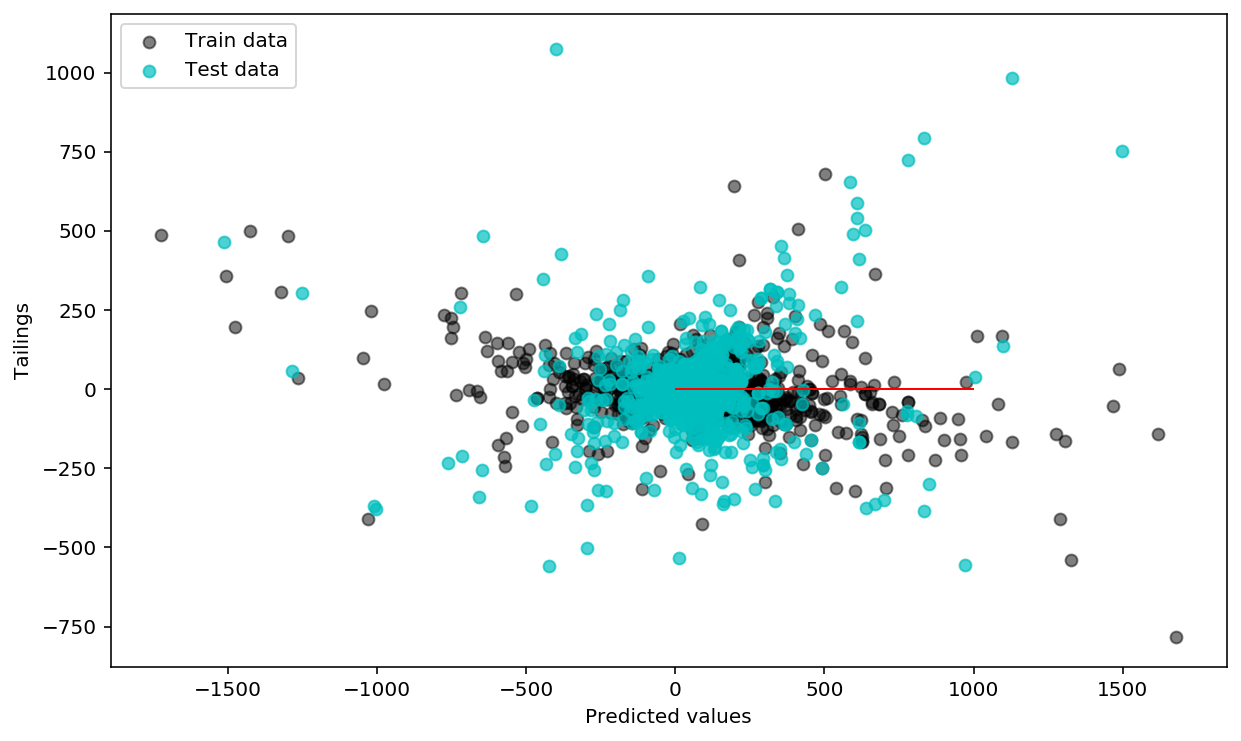

In [412]:
pl.figure(figsize=(10,6))

pl.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 1000, lw = 1, color = 'red')
pl.show()

In [413]:
forest.score(x_train,y_train)

0.9305436937889272

In [415]:
np.sqrt(mean_squared_error(y_test,forest.predict(x_test)))

89.06740122166933

In [390]:
! jupyter nbconvert --to html OrdersProject.ipynb

[NbConvertApp] Converting notebook OrdersProject.ipynb to html
[NbConvertApp] Writing 1498824 bytes to OrdersProject.html


>>>>>>>>  Volkan Eymir Akçora